# importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# importing & exploring the data

In [4]:
df = pd.read_csv('emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
spam = df[df['spam'] == 1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [7]:
ham = df[df['spam'] == 0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [8]:
df.spam.value_counts()

0    4360
1    1368
Name: spam, dtype: int64

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spam', ylabel='count'>

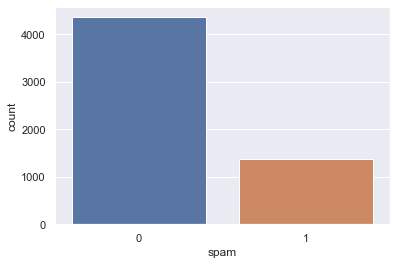

In [9]:
sns.countplot(df['spam'])

# spam and ham percentages

In [11]:
print("spam_percentage: " + str(100 * len(spam) / len(df['text'])) + "%")

spam_percentage: 23.88268156424581%


In [12]:
print("ham_percentage: " + str(100 * len(ham) / len(df['text'])) + "%")

ham_percentage: 76.11731843575419%


# converting the text data to numerical

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv = CountVectorizer()
text_cv = cv.fit_transform(df['text'])

In [22]:
X = text_cv.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
y = df['spam'].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# spliting the data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
# naive_bayes model

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [32]:
nb_model = MultinomialNB()
y_pred = nb_clf.fit(X_train, y_train).predict(X_test)

In [33]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [34]:
y_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

# model evaluation

In [124]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [126]:
accuracy_score(y_test, y_pred)

0.9883659439450027

<AxesSubplot:>

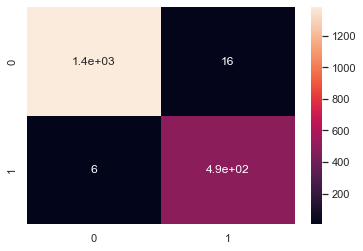

In [128]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1398
           1       0.97      0.99      0.98       493

    accuracy                           0.99      1891
   macro avg       0.98      0.99      0.99      1891
weighted avg       0.99      0.99      0.99      1891



# another model 

In [122]:
from sklearn.svm import SVC
scv_clf = SVC(kernel='rbf', C=100)
scv_y_pred = scv_clf.fit(X_train, y_train).predict(X_test)

In [123]:
accuracy_score(y_test, scv_y_pred)

0.9772607086197779

In [130]:
print(classification_report(y_test, scv_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1398
           1       0.98      0.93      0.96       493

    accuracy                           0.98      1891
   macro avg       0.98      0.96      0.97      1891
weighted avg       0.98      0.98      0.98      1891



<AxesSubplot:>

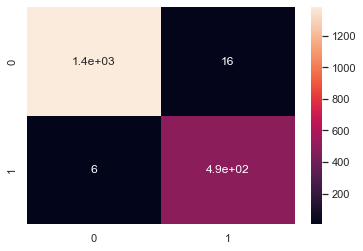

In [131]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# thank you